In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl

# Week 15 Clustering

**Expected time = 2 hours**

## Assignment overview


This week you are learning about clustering. 
Clustering can be defined as 'the process of organising objects into groups whose members are similar in some way'.
Clustering is crucial because it determines the intrinsic grouping within unlabelled data. Clustering algorithms make some assumptions about data points to constitute their similarity. Thus, each hypothesis will construct different but equally valid clusters.

For example, if you built a fruit classifier, it would say 'this is an orange, this is an apple', based on you showing it examples of apples and oranges.
Clustering is the result of unsupervised learning, which means that you’ve seen lots of examples but don’t have labels. In this case, the clustering might return with 'fruits with soft skin and lots of dimples', 'fruits with shiny hard skin'  based merely on showing lots of fruit to the system, but not identifying the names of the different types of fruit. 


This assignment is designed to help you apply the machine learning algorithms you have learnt using packages in Python. Python concepts, instructions and a starter code are embedded within this Jupyter Notebook to guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.


### Learning objectives


- Define the concept of proximity for clustering methods
- Outline the steps involved in hierarchical clustering
- Understand why hierarchical clustering is myopic
- Outline the steps involved in K-means clustering



## Index:

#### Week 10:   Clustering


- [Part 1](#part1)- Hierarchical clustering
- [Part 2](#part2)- A simple example of hierarchical clustering  
- [Part 3](#part3) - Clustering
- [Part 4](#part4) - Importing the data set and exploratory data analysis (EDA)
- [Part 5](#part5) - Data preprocessing
- [Part 6](#part6)- Identify the areas in the city that experience more criminal activity
- [Part 7](#part7)- Clustering without normalisation
- [Part 8](#part8)- Clustering with normalisation
- [Part 9](#part9)- Using elbow curves





[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - Hierarchical clustering
    

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other, and the objects within each cluster are broadly similar to each other.

#### How hierarchical clustering works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. 


The main output of hierarchical clustering is a **dendrogram**, which shows the hierarchical relationship between the clusters.


#### Measures of distance (similarity)

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city (like in the worked example above), the city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.


#### Linkage criteria
After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the centre of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archaeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.


### Steps to perform hierarchical clustering

- Step 1: First, we assign all the points to an individual cluster.
- Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance.
- Step 3: We will repeat Step 2 until only a single cluster is left.
- Step 4: How should we choose the number of clusters in hierarchical clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a dendrogram.
Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Therefore, the longer the distance of the vertical lines in the dendrogram, the longer the distance between those clusters.

Finally, we can set a threshold distance and draw a horizontal line across the dendrogram. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.


[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - A simple example of hierarchical clustering

After seeing what the basic steps of hierarchical clustering are, it's now time to walk through a simple example to test our understanding.

We will be working on a wholesale customer segmentation problem. You can download the data set using [this](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv) link. The data is hosted on the UCI Machine Learning repository. 

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories such as milk, grocery, region, etc.

As usual, we begin by importing the data set, Complete the code cell below by adding the name of the data set, "Wholesale customers data.csv" a `str` to `.read_csv()`. Assign the dataframe to the variable `data`.

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

Run the code cell below to visualise the first 5 rows of our dataframe.

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. 

Our aim is to make clusters from this data that can segment similar clients together. Of course, hierarchical clustering seems to be the right strategy to solve this problem.


Run the code cell below to import the function `normalize()` from `scikit-learn` that we will use to normalise the data

In [4]:
from sklearn.preprocessing import normalize

Complete the code cell below by normalising the dataframe `data`. Assign the new data to the object `data_scaled`.

Next, use the `pandas` function `DataFrame()` to convert `data_scaled` to a dataframe `data_scaled`.
For convenience, set the parameter `columns = data.columns` to keep the original column names.

In [5]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)


Run the code cell below to visualise the normalised dataframe.

In [6]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Next,  let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

Run the code cell below to create the dendrogram.

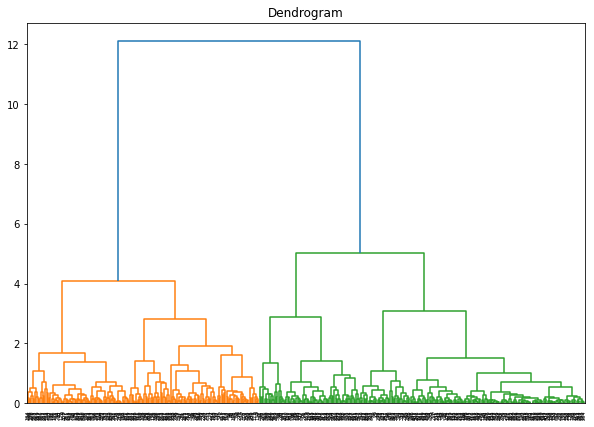

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence, we can decide on a threshold of 6 and cut the dendrogram.

Run the code cell below to visualise the dendrogram with the threshold line.

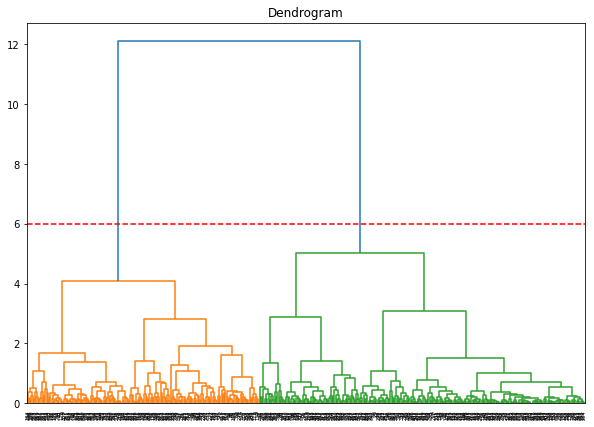

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

How many clusters do we have at this point?

Answer: 2

We can now use the `AgglomerativeClustering()` from `scikit-learn` to apply hierarchical clustering for two clusters. The documentation about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [9]:
from sklearn.cluster import AgglomerativeClustering

Complete the code cell below by setting the following parameters for `AgglomerativeClustering`
    
- `n_clusters = 2`
- `affinity='euclidean`
- `linkage='ward`

Finally, use the `fit_predict()` of the scaled dataframe to apply the clustering to our data.

In [10]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Why can we only see the values of 0s and 1s in the output?

Because there are two clusters at this point. 


Let’s now visualise the two clusters:

Text(0, 0.5, 'Grocery')

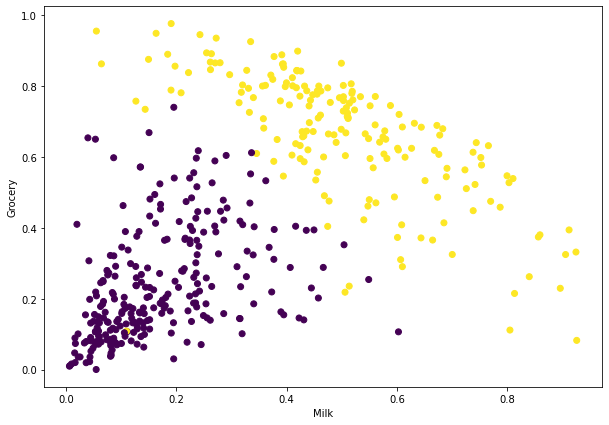

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 
plt.xlabel('Milk')
plt.ylabel('Grocery')

Awesome! As expected, we can clearly visualise the two clusters.

[Back to top](#Index:) 

<a id='part3'></a>

### Part 3 -  Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabelled data (i.e. data without defined categories or groups). The goal of this algorithm is to find groups in the data with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided. Data points are clustered based on the similarity in features. The results of the K-means clustering algorithm are as follows:

- The centroids of the K clusters, which can be used to label new data

- Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret the kind of group each cluster represents.

### Visualising crimes in Chicago using clustering


In this notebook, we will try and exploit information  regarding crimes in Chicago. We will perform the following steps:


- 1. Read the `Crimes_2001_to_present_sample.csv` file in Python
- 2. Drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Next, convert the column `Date` to datetime format and define two new columns, `date` and `time`.
- 3. Define a dataframe, `sub_df` with the columns `Ward`, `IUCR` and  `District`. Impute all the missing values with the most frequent value in each column. Drop any non-numerical value in the column `IUCR`.
- 4. Perform clustering without normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.
- 5. Perform clustering with normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to  predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.




[Back to top](#Index:) 

<a id='part4'></a>

### Part 4 -  Importing the data set and exploratory data analysis (EDA)

The data set contains records from 2001 to present day, but with only 65k-66k records compared to the original dataset, which has around 6.6m records. If anyone is interested in analysing the original data set, it can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

Nonetheless, 65k instances should be enough information to give us some good insights into the crime scene in Chicago. Let's get started by importing the necessary libraries.

 We will then use `pandas` to import the data set. Complete the code cell below by adding the name of the data set as a `str` to `.read_csv()`. Assign the dataframe to the variable `df`.

In [12]:
df=pd.read_csv('Crimes_2001_to_present_sample.csv')



Before building any machine learning algorithms, we should explore the data.

We begin by visualising the first ten rows of the dataframe `df` using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe.

Complete the code cell below by passing the desired number of rows as an `int` to the function `.head()`.

In [13]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"


[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 - Data preprocessing

When building any machine learning algorithm, it is always useful, after analysing your data, to eliminate features that are redundant or that won't be useful in our analysis.

Complete the code cell below to drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Remember to include the names of the columns in square brackets and that the axis parameter in `.drop()` controls whether the function acts on rows or columns.

In [14]:
df.drop(['X Coordinate', 'Y Coordinate', 'Updated On', 'Location', 'Beat'],axis=1)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,True,2.0,4.0,39.0,04B,2014,41.809597,-87.601016
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,True,15.0,29.0,25.0,14,2002,41.873845,-87.763183
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,False,17.0,39.0,13.0,15,2005,41.973168,-87.713495
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,11.0,27.0,23.0,26,2006,41.895505,-87.711742
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,11.0,24.0,25.0,16,2006,41.871248,-87.744926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,2329738,7370796,HS173036,02/20/2010 06:06:00 AM,008XX W NORTH AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,18.0,43.0,8.0,15,2010,41.910888,-87.650199
62829,6105927,1953820,HH142713,01/23/2002 04:15:00 AM,0000X W 68 ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,7.0,NaN,NaN,14,2002,41.770914,-87.627048
62830,4691982,3360661,HK392170,05/27/2004 05:55:25 PM,076XX S CICERO AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,8.0,13.0,65.0,06,2004,41.754593,-87.741529
62831,2124391,7133885,HR542961,09/18/2009 12:01:00 AM,034XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,17.0,35.0,16.0,07,2009,41.953833,-87.714664


It may be useful for our analysis to know the date and the time when a certain crime happened. All this information is enclosed in the column `Date`. However, if you run the cell below, you may observe that the entries in `Date` are of type "object" instead of a date-specific object like `Timestamp`.

In [15]:
print(df.Date.dtype)

object


Luckily,  `pandas` comes with a very powerful function, `datetime()`, that can convert date strings to the datetime format. Documentation about this function can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Complete the code cell below by applying the function `datetime` on the column `Date`.

In [18]:
df['Date'] = pd.to_datetime(df.Date) 


The function `datetime` is so powerful that it allows us to separate the date from the time.

Run the code cell below to see how we create a new column `date` containing just the date of the crime. This cell uses list comprehension to convert each date and time in `Date` to a date. The resulting list is reassigned to the column `date`.

In [19]:
df['date'] = [d.date() for d in df['Date']]

Following the syntax used in the code cell above, complete the cell below to create a columns `time` containing the time at which each crime happened.

In [21]:
df['time'] = [d.time() for d in df['Date']]


Let's visualise the new dataframe. Notice the two new columns we have just created.

In [22]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,time
0,4506608,9878952,HX529642,2014-12-04 09:30:00,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)",2014-12-04,09:30:00
1,561379,2514319,HH857213,2002-12-24 09:00:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)",2002-12-24,09:00:00
2,5058884,3891396,HL266026,2005-03-31 11:46:00,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)",2005-03-31,11:46:00
3,3619502,4983700,HM446634,2006-06-30 16:44:00,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)",2006-06-30,16:44:00
4,5533749,5284225,HM654977,2006-10-11 23:05:00,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)",2006-10-11,23:05:00


[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 -  Identify the areas in the city that experience more criminal activity

To identify which portions of the city experience criminal attacks of which type, it may be useful to  cluster the data according to the `District`, `Ward` and `Primary Type`(as per IUCR [Illinois Uniform Crime Reporting] code). IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports, you can find more information [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data)).

Because we are only interested in the features `District`, `Ward` and `Primary Type`, it may be convenient to select only those features from the original dataframe.

Complete the cell below by extracting  `District`, `Ward` and `Primary Type` from `df` and assign the new dataframe to `sub_df`.

In [46]:
sub_df = df[['IUCR','District', 'Ward', 'Primary Type']]

Let's visualise our new dataframe.

In [47]:
sub_df
one_hot = pd.get_dummies(sub_df['Primary Type'], prefix='type')
sub_df = sub_df.join(one_hot)
sub_df.drop(['Primary Type'], axis=1, inplace=True)
sub_df

,IUCR,District,Ward,type_ARSON,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIM SEXUAL ASSAULT,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,...,type_OFFENSE INVOLVING CHILDREN,type_OTHER NARCOTIC VIOLATION,type_OTHER OFFENSE,type_PROSTITUTION,type_PUBLIC PEACE VIOLATION,type_ROBBERY,type_SEX OFFENSE,type_STALKING,type_THEFT,type_WEAPONS VIOLATION
0,0497,2.0,4.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1320,15.0,29.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,141C,17.0,39.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2092,11.0,27.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1506,11.0,24.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,143A,18.0,43.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
62829,1310,7.0,NaN,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
62830,0860,8.0,13.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
62831,0910,17.0,35.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We can see that we have some missing values (NaNs). The general technique to fill missing values in a dataframe is call **imputation**.

A very popular way to impute values is by filling missing values with the most frequent value from one column. This can be done by using the function `.apply()` on our dataframe together with the appropriate lambda function.

Complete the lambda function that needs to be passed to `.apply()` in the code cell below.

**HINT:** Use a combination of the functions `fillna()`, `value_counts()` and `index()`.

In [48]:
sub_df = sub_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
sub_df

,IUCR,District,Ward,type_ARSON,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIM SEXUAL ASSAULT,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,...,type_OFFENSE INVOLVING CHILDREN,type_OTHER NARCOTIC VIOLATION,type_OTHER OFFENSE,type_PROSTITUTION,type_PUBLIC PEACE VIOLATION,type_ROBBERY,type_SEX OFFENSE,type_STALKING,type_THEFT,type_WEAPONS VIOLATION
0,0497,2.0,4.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1320,15.0,29.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,141C,17.0,39.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2092,11.0,27.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1506,11.0,24.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,143A,18.0,43.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
62829,1310,7.0,28.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
62830,0860,8.0,13.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
62831,0910,17.0,35.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Finally, before moving on to clustering we will extract the numeric values in the columns `IUCR` and visualize our new dataframe.

Run the code cell below.

In [49]:
sub_df['IUCR'] = sub_df.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_df.head()

,IUCR,District,Ward,type_ARSON,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIM SEXUAL ASSAULT,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,...,type_OFFENSE INVOLVING CHILDREN,type_OTHER NARCOTIC VIOLATION,type_OTHER OFFENSE,type_PROSTITUTION,type_PUBLIC PEACE VIOLATION,type_ROBBERY,type_SEX OFFENSE,type_STALKING,type_THEFT,type_WEAPONS VIOLATION
0,497,2.0,4.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1320,15.0,29.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,141,17.0,39.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2092,11.0,27.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1506,11.0,24.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - K-means Clustering without normalisation

First of all we will fit a K-means cluster with k=10. We won't normalize the data at first to see what happens. 

Complete the code cell below by importing `Kmeans` from `sklearn.cluster`.

In [50]:
from sklearn.cluster import KMeans


Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [53]:
km = KMeans(n_clusters=10)
km.fit(sub_df)
predictions = km.predict(sub_df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Run the code cell below to visualise the clusters obtained without normalisation.

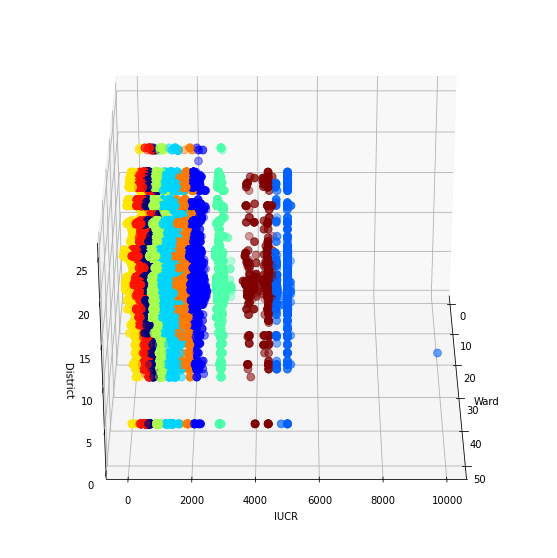

In [54]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

What do you notice about the clusters? 
Non uniform scaling

[Back to top](#Index:) 

<a id='part8'></a>

### Part 8 - K-means Clustering with normalisation

As expected, K-means without normalisation doesn't work very well. We can fix this by normalising the data.
    


We start by normalizing the data.

In the code cell below, we have normalised the column `IUCR` using the formula:

$$y_\text{norm} = \frac{y - \min(y)}{\max(y) - \min(y)}$$

In [55]:
sub_df['IUCR'] = (sub_df['IUCR'] - sub_df['IUCR'].min())/(sub_df['IUCR'].max()-sub_df['IUCR'].min())

Complete the code cell below to normalise the columns `Ward` and `District` following the example given above.

In [56]:
sub_df['Ward'] = (sub_df['Ward'] - sub_df['Ward'].min())/(sub_df['Ward'].max()-sub_df['Ward'].min())
sub_df['District'] = (sub_df['District'] - sub_df['District'].min())/(sub_df['District'].max()-sub_df['District'].min())

Without normalising the data, the best number of clusters is around 4, so let's try that out!

Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [57]:
km = KMeans(n_clusters=10)
km.fit(sub_df)
predictions = km.predict(sub_df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Run the code cell below to visualise the clusters obtained without normalisation. you can change the value in `ax.view_init(azim=90)` to rotate the plot.

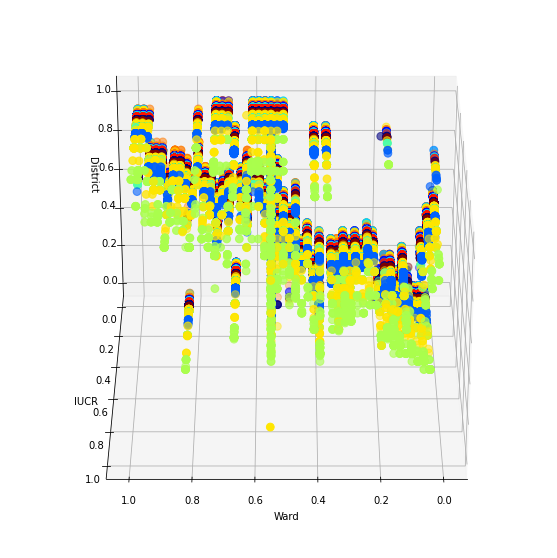

In [58]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

How did the clusters change from the unnormalized version? 
Equalization of Feature Scales: Normalization rescales the features so that they all have similar scales. In K-means clustering, the algorithm calculates distances between data points based on the features. Features with larger scales can dominate the distance calculations, leading to biased cluster assignments. Normalization helps to mitigate this issue by equalizing the influence of all features on the clustering process

[Back to top](#Index:) 

<a id='part9'></a>

### Part 9 - Using the Elbow Rule

To find the **optimal number of clusters**, we will go with the elbow rule, which states that on the curve of score vs the number of clusters, the optimal point is where the first bend (or *elbow*) occurs, because after that the the score eventually decreases to zero and each point starts behaving as its own cluster. 

Next, to reproduce the "elbow chart", we need to compute the score for each number of clusters.

First, we need a list of models defined for a varying number of clusters. Then, we can fit each model on the data to get a score for the model and determine the model with the best number of clusters.

Complete the for loop in the code cell below to compute the K-means for the given range of values. This for loop returns a list of `Kmeans` model objects, each of which has a different number of clusters ranging from 1 to 10.

In [60]:
N = range(1, 20)
kmeans = []
for i in N:
    km = KMeans(n_clusters=10)
    km.fit(sub_df)
    kmeans.append(km)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

Next, let's compute the score. Run the code cell below.


In [61]:
score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(sub_df).score(sub_df))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

Finally, let's plot our new elbow curve. Run the code below to plot the elbow curve.

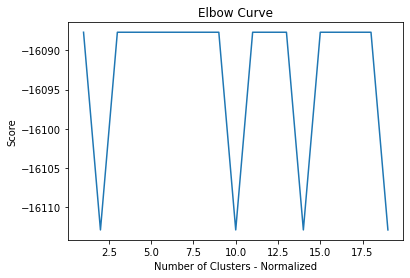

In [62]:
pl.plot(N,score)
pl.xlabel('Number of Clusters - Normalized')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

What does the optimal number of clusters seem to be now?


Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [63]:
km = KMeans(n_clusters=3)
km.fit(sub_df)
predictions = km.predict(sub_df)

sub_df['Clusters_norm'] = predictions
sub_df


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,IUCR,District,Ward,type_ARSON,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIM SEXUAL ASSAULT,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,...,type_OTHER NARCOTIC VIOLATION,type_OTHER OFFENSE,type_PROSTITUTION,type_PUBLIC PEACE VIOLATION,type_ROBBERY,type_SEX OFFENSE,type_STALKING,type_THEFT,type_WEAPONS VIOLATION,Clusters_norm
0,0.047214,0.041667,0.061224,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,0.130598,0.583333,0.571429,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
2,0.011145,0.666667,0.775510,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
3,0.208815,0.416667,0.530612,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,0.149443,0.416667,0.469388,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,0.011348,0.708333,0.857143,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
62829,0.129585,0.250000,0.551020,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
62830,0.083992,0.291667,0.244898,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2
62831,0.089058,0.666667,0.693878,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


Here's what the updated clusters look like.

![](cluster_norm.png)


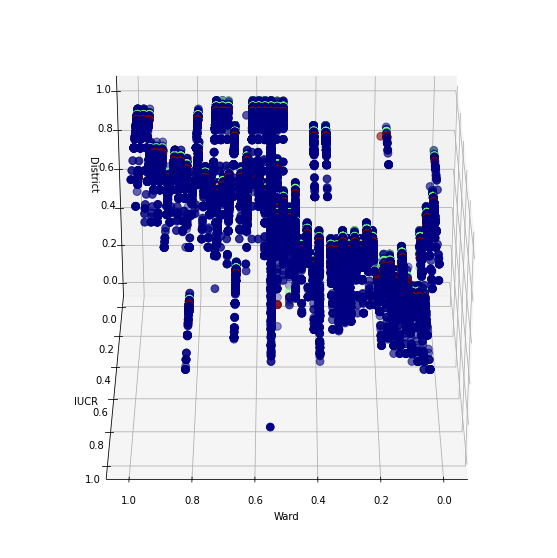

In [65]:

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_df["Clusters_norm"], s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

Congratulations you've completed this notebook! 
